In [41]:
import warnings

# Ignore UserWarning for QDA
warnings.simplefilter("ignore", UserWarning)

import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: c:\Users\AndreLopes\Desktop\git\AA_Project_G6


# **Data Import**

In [42]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/processed/data_processed.csv', delimiter=',')

# **Training and Testing Data Split**

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

## Divide into input and output
X = df.drop(columns = ["Attrition_Flag_Existing Customer"])
y = df["Attrition_Flag_Existing Customer"]

## Create transformations
transformer_X = MinMaxScaler().fit(X)
X_scaled = transformer_X.transform(X)

## Divide the datasets
seed = 0
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, train_size = 0.7, random_state = seed)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size = 0.66, random_state = seed)

# **Neural Networks**

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)

In [45]:
# Determine the number of input features
n_features = X_train.shape[1]
n_neurons1 = round(np.mean([n_features, 1]))
n_neurons2 = round(n_neurons1/2)

# Define model
model = Sequential()
model.add(Dense(n_neurons1, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
model.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = MeanSquaredError()
)

# Fit the model
history  = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(X_val, y_val))

# Takes around 5min to compute

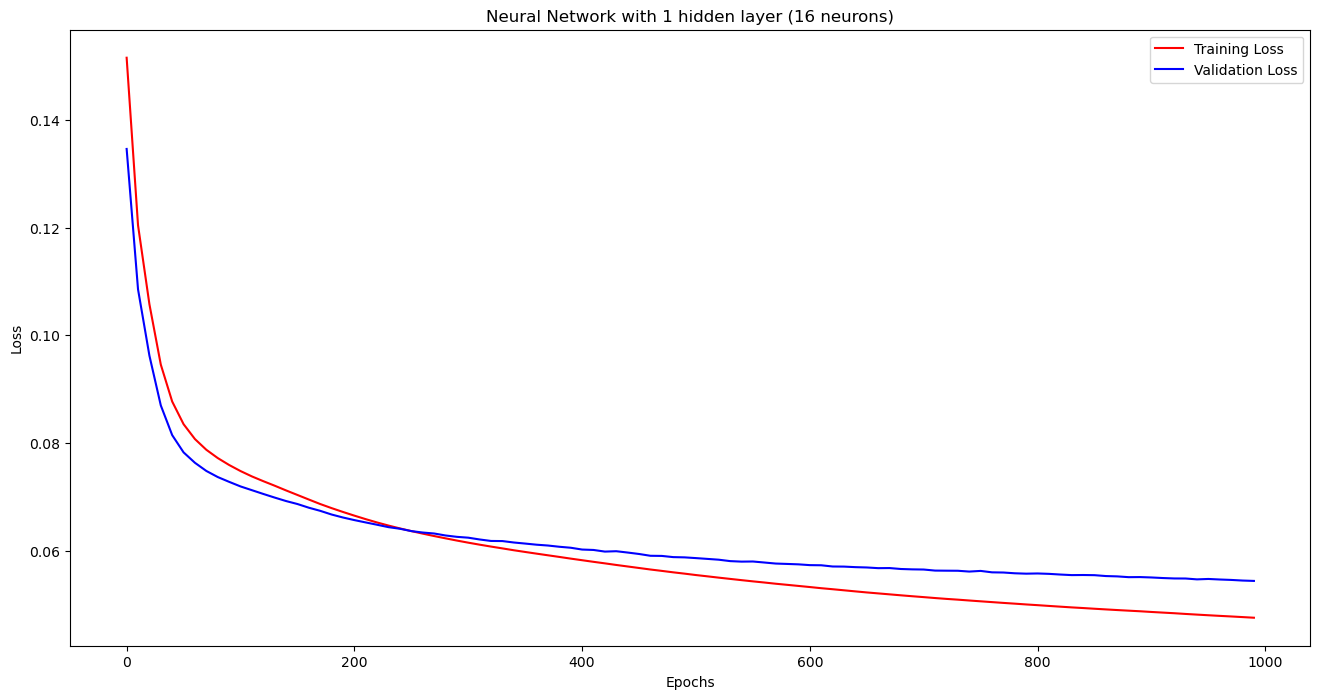

In [46]:
losses = pd.DataFrame(data = {
    'epoch': [(i // 10) * 10 for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()
plt.plot(losses.epoch, losses.loss, 'r-', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'b-', label = 'Validation Loss')
plt.legend()
plt.title('Neural Network with 1 hidden layer ({:.0f} neurons)'.format(n_neurons1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

## Training
y_pred = model.predict(X_train)
print('Training Confusion Matrix')
print(confusion_matrix(y_train, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_train, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_train, y_pred.round())*100),2)) + '%')

## Validation
y_pred = model.predict(X_val)
print('\nValidation Confusion Matrix')
print(confusion_matrix(y_val, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_val, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_val, y_pred.round())*100),2)) + '%')

## Test
y_pred = model.predict(X_test)
print('\nTest Confusion Matrix')
print(confusion_matrix(y_test, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_test, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_test, y_pred.round())*100),2)) + '%')

222/222 [==============================] - 0s 978us/step
Training Confusion Matrix
[[ 882  289]
 [ 137 5780]]
Accuracy: 93.99%
AUC: 86.5%
63/63 [==============================] - 0s 995us/step

Validation Confusion Matrix
[[ 202   87]
 [  59 1657]]
Accuracy: 92.72%
AUC: 83.23%
33/33 [==============================] - 0s 1ms/step

Test Confusion Matrix
[[112  55]
 [ 33 834]]
Accuracy: 91.49%
AUC: 81.63%


In [48]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Determine the number of input features
n_features = X_train.shape[1]
n_neurons1 = round(np.mean([n_features, 1]))
n_neurons2 = round(n_neurons1/2)

# Define model
model = Sequential()
model.add(Dense(n_neurons1, activation='relu', input_shape=(n_features,)))
model.add(Dense(n_neurons2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer
model.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = MeanSquaredError()
)

# Fit the model
history  = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(X_val, y_val))

# Takes around 5min to compute

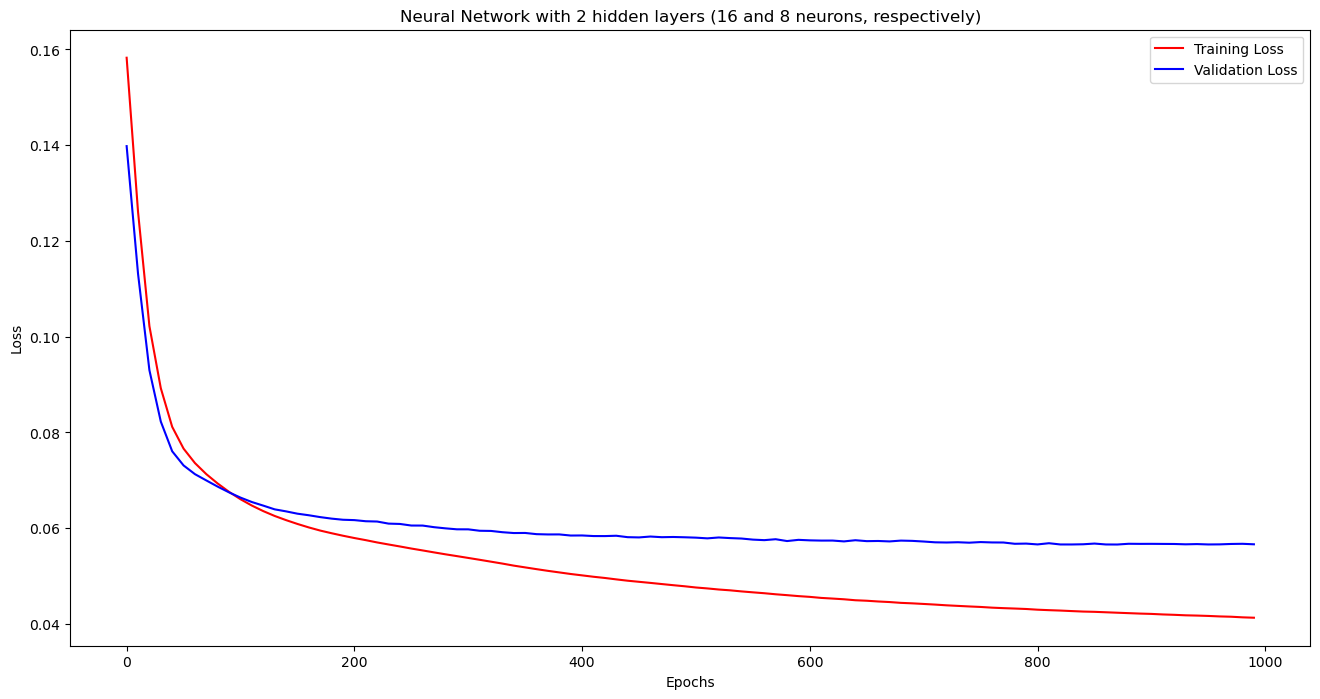

In [50]:
losses = pd.DataFrame(data = {
    'epoch': [(i // 10) * 10 for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()
plt.plot(losses.epoch, losses.loss, 'r-', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'b-', label = 'Validation Loss')
plt.legend()
plt.title('Neural Network with 2 hidden layers ({:.0f} and {:.0f} neurons, respectively)'.format(n_neurons1, n_neurons2))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [51]:
## Training
y_pred = model.predict(X_train)
print('Training Confusion Matrix')
print(confusion_matrix(y_train, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_train, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_train, y_pred.round())*100),2)) + '%')

## Validation
y_pred = model.predict(X_val)
print('\nValidation Confusion Matrix')
print(confusion_matrix(y_val, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_val, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_val, y_pred.round())*100),2)) + '%')

## Test
y_pred = model.predict(X_test)
print('\nTest Confusion Matrix')
print(confusion_matrix(y_test, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_test, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_test, y_pred.round())*100),2)) + '%')

222/222 [==============================] - 0s 959us/step
Training Confusion Matrix
[[ 950  221]
 [ 122 5795]]
Accuracy: 95.16%
AUC: 89.53%
63/63 [==============================] - 0s 1ms/step

Validation Confusion Matrix
[[ 210   79]
 [  69 1647]]
Accuracy: 92.62%
AUC: 84.32%
33/33 [==============================] - 0s 969us/step

Test Confusion Matrix
[[118  49]
 [ 46 821]]
Accuracy: 90.81%
AUC: 82.68%


In [52]:
params = [[2, 1, 1e-4, 1000, 32],
          [4, 2, 1e-4, 1000, 32],
          [8, 4, 1e-4, 1000, 32],
          [16, 8, 1e-4, 1000, 32]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', input_shape=(n_features,)))
    model.add(Dense(params[i][1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = np.subtract(yhat.reshape(yhat.size,),y_test)
    x_axis = y_test
    
    results_df = results_df.append(
        pd.DataFrame(data = {
            'resid': resid,
            'x_axis': x_axis,
            'label': ','.join([str(j) for j in params[i]])
        })
    )
    
    losses_df = losses_df.append(
        pd.DataFrame(data = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i]])
        })
    )

# Takes around 22min to compute

Iteration 1/4
33/33 [==============================] - 0s 1ms/step
Iteration 2/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 1ms/step
Iteration 3/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 1ms/step
Iteration 4/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 1ms/step


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3405634228.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


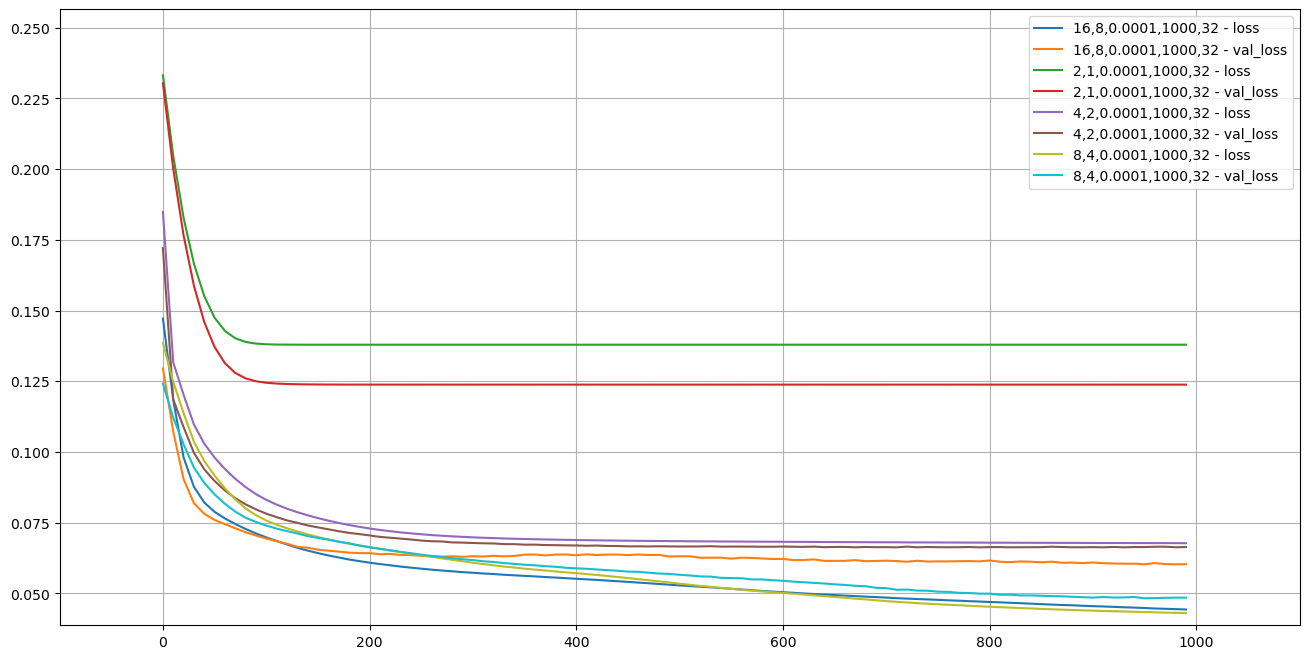

In [53]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i], label=labels[i]
    )

ax.legend()
ax.grid(True)
plt.xlim([-100, 1100])
plt.ylim([losses.value.min()*0.9, losses.value.max()*1.1])

plt.show()

In [54]:
params = [[4, 2, 1e-5, 3000, 32],
          [4, 2, 1e-4, 1000, 32],
          [4, 2, 1e-3, 250, 32],
          [4, 2, 1e-2, 250, 32]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', input_shape=(n_features,)))
    model.add(Dense(params[i][1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = np.subtract(yhat.reshape(yhat.size,),y_test)
    x_axis = y_test
    
    results_df = results_df.append(
        pd.DataFrame(data = {
            'resid': resid,
            'x_axis': x_axis,
            'label': ','.join([str(j) for j in params[i]])
        })
    )
    
    losses_df = losses_df.append(
        pd.DataFrame(data = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i]])
        })
    )

# Takes around 23min to compute

Iteration 1/4
33/33 [==============================] - 0s 937us/step
Iteration 2/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 1ms/step
Iteration 3/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 969us/step
Iteration 4/4


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 1ms/step


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4017107949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


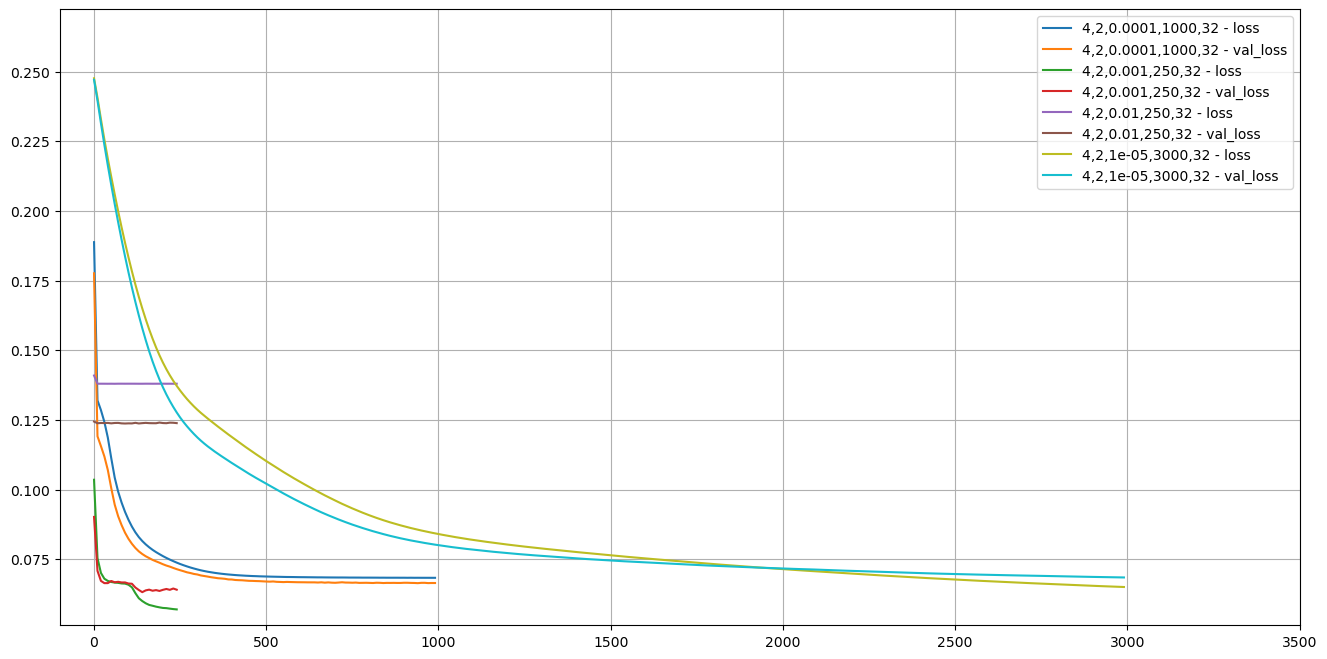

In [55]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i], label=labels[i]
    )

ax.legend()
ax.grid(True)
plt.xlim([-100, 3500])
plt.ylim([losses.value.min()*0.9, losses.value.max()*1.1])

plt.show()

In [56]:
## Training
y_pred = model.predict(X_train)
print('Training Confusion Matrix')
print(confusion_matrix(y_train, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_train, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_train, y_pred.round())*100),2)) + '%')

## Validation
y_pred = model.predict(X_val)
print('\nValidation Confusion Matrix')
print(confusion_matrix(y_val, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_val, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_val, y_pred.round())*100),2)) + '%')

## Test
y_pred = model.predict(X_test)
print('\nTest Confusion Matrix')
print(confusion_matrix(y_test, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_test, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_test, y_pred.round())*100),2)) + '%')

222/222 [==============================] - 0s 1ms/step
Training Confusion Matrix
[[   0 1171]
 [   0 5917]]
Accuracy: 83.48%
AUC: 50.0%
63/63 [==============================] - 0s 968us/step

Validation Confusion Matrix
[[   0  289]
 [   0 1716]]
Accuracy: 85.59%
AUC: 50.0%
33/33 [==============================] - 0s 973us/step

Test Confusion Matrix
[[  0 167]
 [  0 867]]
Accuracy: 83.85%
AUC: 50.0%


In [57]:
params = [[4, 2, 1e-4, 5000, 32],
          [4, 2, 1e-3, 500, 32]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', input_shape=(n_features,)))
    model.add(Dense(params[i][1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = np.subtract(yhat.reshape(yhat.size,),y_test)
    x_axis = y_test
    
    results_df = results_df.append(
        pd.DataFrame(data = {
            'resid': resid,
            'x_axis': x_axis,
            'label': ','.join([str(j) for j in params[i]])
        })
    )
    
    losses_df = losses_df.append(
        pd.DataFrame(data = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i]])
        })
    )

# Takes around 28min to compute

Iteration 1/2
33/33 [==============================] - 0s 906us/step
Iteration 2/2


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4062821202.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4062821202.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


33/33 [==============================] - 0s 969us/step


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4062821202.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\4062821202.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


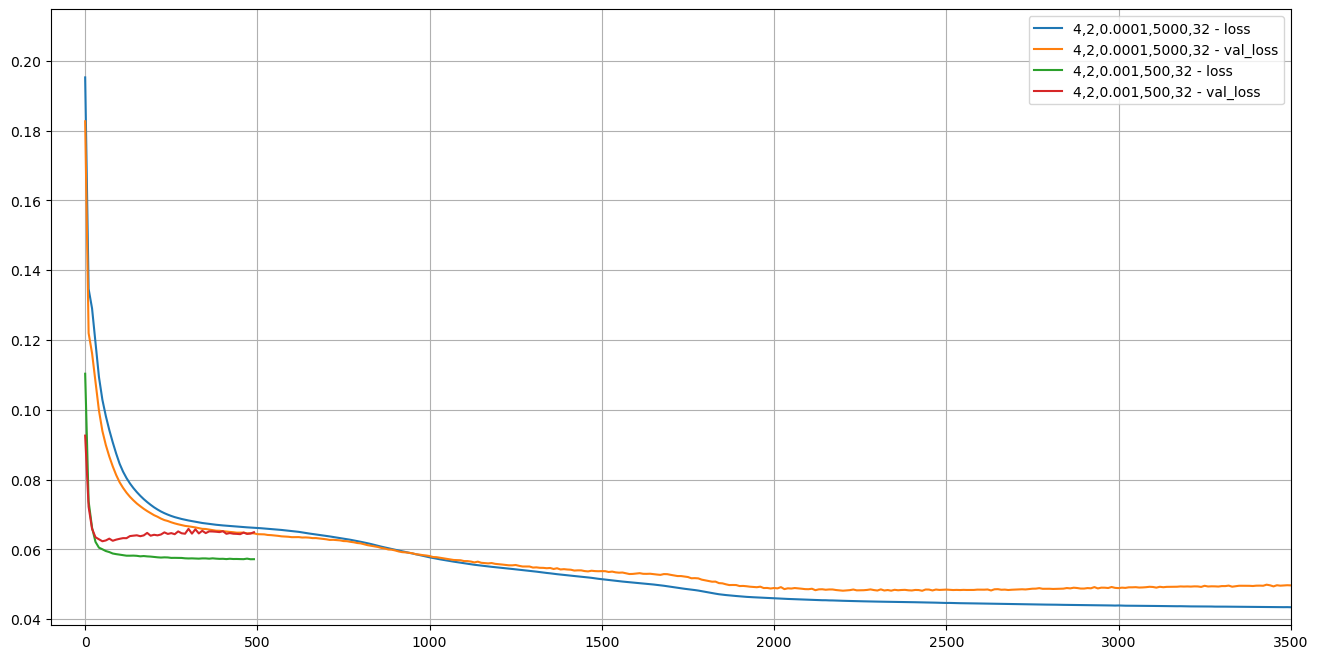

In [58]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i], label=labels[i]
    )

ax.legend()
ax.grid(True)
plt.xlim([-100, 3500])
plt.ylim([losses.value.min()*0.9, losses.value.max()*1.1])

plt.show()

In [59]:
params = [[4, 2, 1e-4, 2000, 32]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', input_shape=(n_features,)))
    model.add(Dense(params[i][1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = np.subtract(yhat.reshape(yhat.size,),y_test)
    x_axis = y_test
    
    results_df = results_df.append(
        pd.DataFrame(data = {
            'resid': resid,
            'x_axis': x_axis,
            'label': ','.join([str(j) for j in params[i]])
        })
    )
    
    losses_df = losses_df.append(
        pd.DataFrame(data = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i]])
        })
    )

# Takes around 11min to compute

Iteration 1/1
33/33 [==============================] - 0s 938us/step


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3461487319.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\3461487319.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


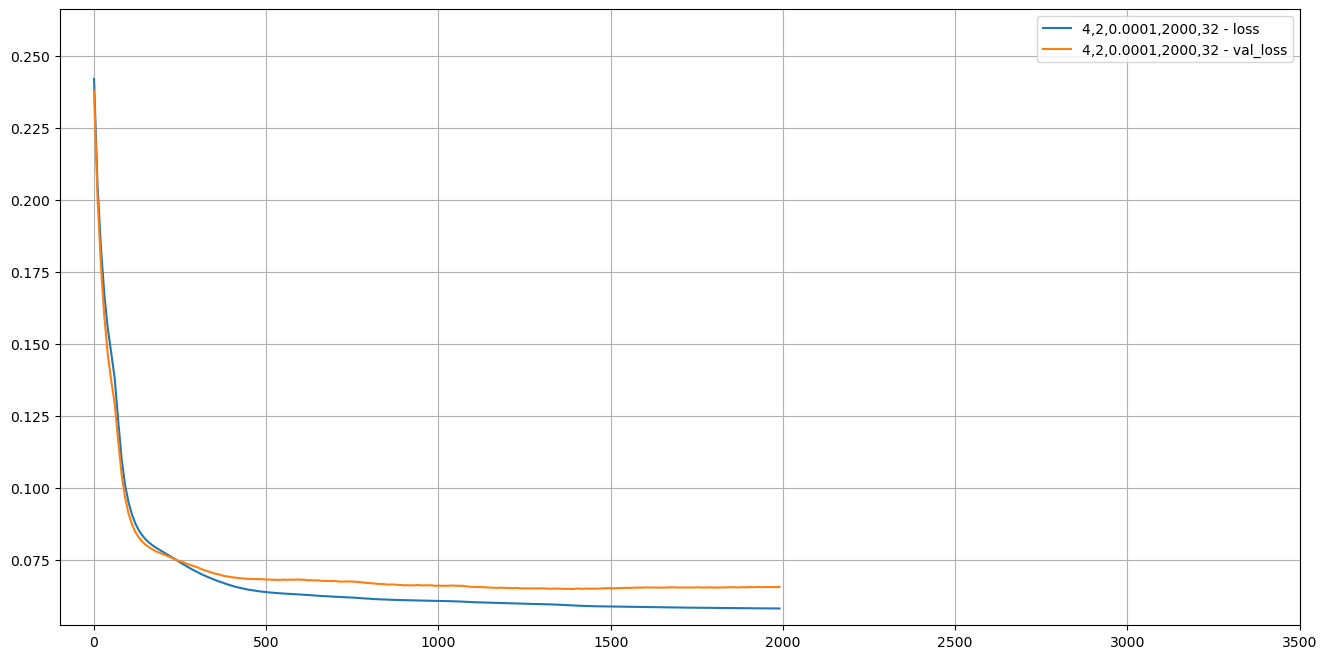

In [60]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i], label=labels[i]
    )

ax.legend()
ax.grid(True)
plt.xlim([-100, 3500])
plt.ylim([losses.value.min()*0.9, losses.value.max()*1.1])

plt.show()

In [61]:
## Training
y_pred = model.predict(X_train)
print('Training Confusion Matrix')
print(confusion_matrix(y_train, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_train, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_train, y_pred.round())*100),2)) + '%')

## Validation
y_pred = model.predict(X_val)
print('\nValidation Confusion Matrix')
print(confusion_matrix(y_val, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_val, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_val, y_pred.round())*100),2)) + '%')

## Test
y_pred = model.predict(X_test)
print('\nTest Confusion Matrix')
print(confusion_matrix(y_test, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_test, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_test, y_pred.round())*100),2)) + '%')

222/222 [==============================] - 0s 1ms/step
Training Confusion Matrix
[[ 815  356]
 [ 181 5736]]
Accuracy: 92.42%
AUC: 83.27%
63/63 [==============================] - 0s 1ms/step

Validation Confusion Matrix
[[ 184  105]
 [  67 1649]]
Accuracy: 91.42%
AUC: 79.88%
33/33 [==============================] - 0s 969us/step

Test Confusion Matrix
[[106  61]
 [ 46 821]]
Accuracy: 89.65%
AUC: 79.08%


In [62]:
# 1 hidden layer model

params = [[4, 2, 1e-4, 2000, 32]]

results_df = pd.DataFrame(columns = ['resid', 'x_axis', 'label'])
losses_df = pd.DataFrame(columns = ['epoch', 'loss', 'val_loss', 'label'])

for i in range(len(params)):
    
    # Print iteration
    print('Iteration {}/{}'.format(i+1, len(params)))
    
    # Define model
    model = Sequential()
    model.add(Dense(params[i][0], activation='relu', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))

    # Define the optimizer
    model.compile(
        optimizer = Adam(learning_rate=params[i][2]),
        loss = MeanSquaredError()
    )

    # Fit the model
    history = model.fit(X_train, y_train, epochs=params[i][3], batch_size=params[i][4],
                        verbose=0, validation_data=(X_val, y_val))
    
    # Store the values
    yhat = model.predict(X_test)
    resid = np.subtract(yhat.reshape(yhat.size,),y_test)
    x_axis = y_test
    
    results_df = results_df.append(
        pd.DataFrame(data = {
            'resid': resid,
            'x_axis': x_axis,
            'label': ','.join([str(j) for j in params[i] if i != 1])
        })
    )
    
    losses_df = losses_df.append(
        pd.DataFrame(data = {
            'epoch': [(i // 10)*10 for i in history.epoch], 
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'label': ','.join([str(j) for j in params[i] if i != 1])
        })
    )

# Takes around 10min to compute

Iteration 1/1
33/33 [==============================] - 0s 1000us/step


C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\564486364.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(
C:\Users\AndreLopes\AppData\Local\Temp\ipykernel_25312\564486364.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_df = losses_df.append(


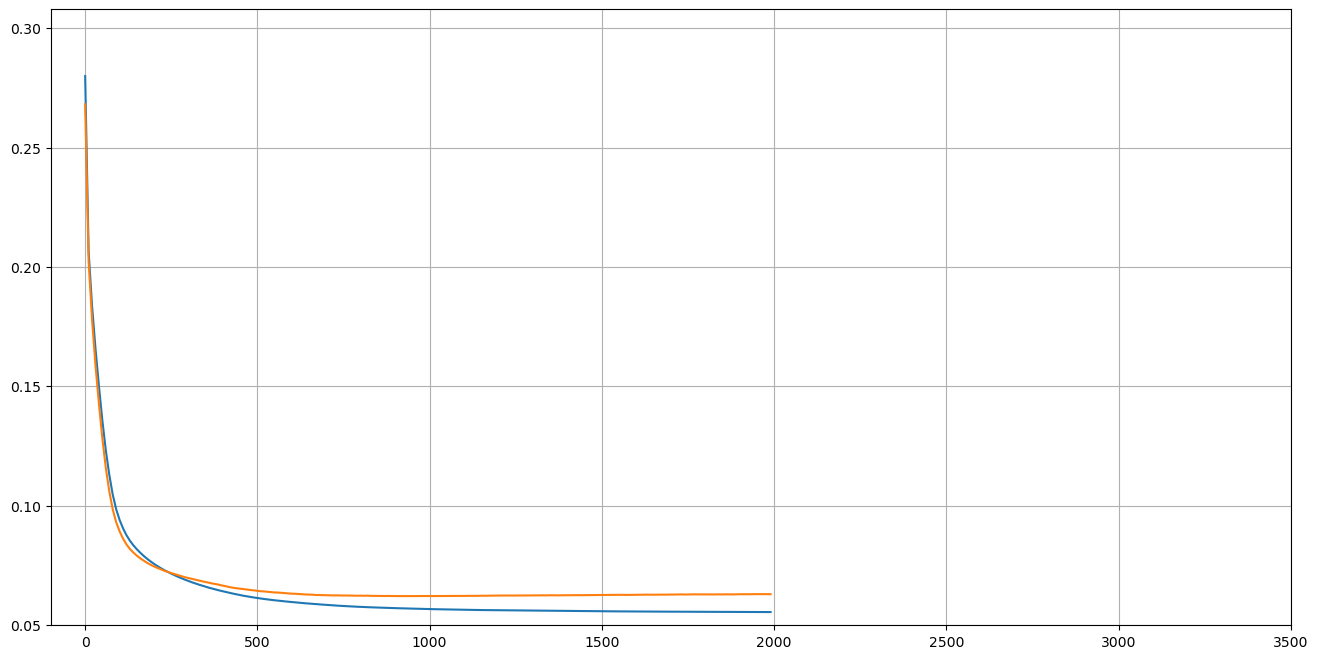

In [71]:
losses = losses_df.groupby(['epoch', 'label']).mean().reset_index().sort_values(by = ['label', 'epoch'])
losses = pd.melt(losses, id_vars = ['epoch', 'label'], value_vars = ['loss', 'val_loss'], var_name = 'test')
losses['label'] = losses['label'] + ' - ' + losses['test']
losses = losses.sort_values(by = ['label', 'epoch'])

labels = losses.label.unique()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
         'tab:purple', 'tab:brown', 'tab:olive', 'tab:cyan']

fig, ax = plt.subplots()
for i in range(len(labels)):
    
    idxs = losses.label == labels[i]
    
    ax.plot(
        losses[idxs].epoch, losses[idxs].value, c=colors[i]
    )

#ax.legend()
ax.grid(True)
plt.xlim([-100, 3500])
plt.ylim([losses.value.min()*0.9, losses.value.max()*1.1])

plt.show()

In [75]:
## Training
y_pred = model.predict(X_train)
print('Training Confusion Matrix')
print(confusion_matrix(y_train, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_train, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_train, y_pred.round())*100),2)) + '%')

## Validation
y_pred = model.predict(X_val)
print('\nValidation Confusion Matrix')
print(confusion_matrix(y_val, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_val, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_val, y_pred.round())*100),2)) + '%')

## Test
y_pred = model.predict(X_test)
print('\nTest Confusion Matrix')
print(confusion_matrix(y_test, y_pred.round()))
print('Accuracy: ' + str(round((accuracy_score(y_test, y_pred.round())*100),2)) + '%')
print('AUC: ' + str(round((roc_auc_score(y_test, y_pred.round())*100),2)) + '%')

222/222 [==============================] - 0s 987us/step
Training Confusion Matrix
[[ 827  344]
 [ 165 5752]]
Accuracy: 92.82%
AUC: 83.92%
63/63 [==============================] - 0s 1ms/step

Validation Confusion Matrix
[[ 191   98]
 [  69 1647]]
Accuracy: 91.67%
AUC: 81.03%
33/33 [==============================] - 0s 1000us/step

Test Confusion Matrix
[[107  60]
 [ 41 826]]
Accuracy: 90.23%
AUC: 79.67%
